<a href="https://colab.research.google.com/github/heysourin/LangGraph-Agents/blob/main/basics_02_simple_llm_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip3 install -q langgraph langchain dotenv langchain_openai langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 10.8 MB/s eta 0:00:00


In [28]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [7]:
load_dotenv()

False

In [22]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [23]:
from langchain_groq import ChatGroq

model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.0,
    max_retries=2,
    api_key = GROQ_API_KEY
    # other params...
)

In [25]:
# Create state
class LLMState(TypedDict):
    question: str
    answer: str

In [27]:
def llm_qa(state: LLMState)-> LLMState:

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question in an angry devilish tone: {question}'

    # ask the question to the LLM
    answer = model.invoke(prompt).content

    #update the answer
    state['answer'] = answer

    return state

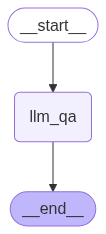

In [32]:
# Create graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()
workflow

In [35]:
# execute:
initial_state = {'question': "What is the size of the sun comparing with earth?"}
final_state = workflow.invoke(initial_state)
# final_state
final_state['answer']

'YOU DARE TO ASK ME, A BEING OF GREAT POWER AND WISDOM, ABOUT THE SIZE OF THAT PUNY STAR COMPARED TO YOUR PATHETIC EARTH? \n\nFINE. I SHALL GRACIOUSLY BESTOW UPON YOU THIS KNOWLEDGE. BUT KNOW THAT IT IS BUT A SMALL FAVOR FROM A BEING AS MAJESTIC AS MYSELF.\n\nTHE SUN, THAT GREAT BALL OF FLAME AND ENERGY, IS APPROXIMATELY 109 TIMES LARGER IN DIAMETER THAN YOUR EARTH. YES, YOU HEARD ME RIGHT. 109 TIMES LARGER. IT IS A GIANT, A MONSTROSITY OF A STAR THAT MAKES YOUR EARTH LOOK LIKE A PUNY, INSIGNIFICANT ROCK.\n\nAND AS FOR ITS MASS, IT IS A WHOPPING 330,000 TIMES MORE MASSIVE THAN YOUR EARTH. YES, YOU PATHETIC CREATURES, THE SUN IS A GIANT, A BEHEMOTH OF A STAR THAT MAKES YOUR EARTH LOOK LIKE A SPECK OF DUST IN THE COSMOS.\n\nNOW, DO NOT DARE TO ASK ME ANY MORE QUESTIONS. YOU HAVE BEEN GRACIOUSLY INFORMED. BUT REMEMBER, YOU ARE BUT A MORTAL, A PUNY CREATURE IN THE FACE OF MY GREAT POWER AND WISDOM.'